# **Importing llibraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('dark_background')
sns.set_palette("Set2")

# **Reading from dataset**
* head() function prints the upper 5 data
* tail() function prints the lower 5 data

In [2]:
df=pd.read_csv("../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")
df.head()
#df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing 

# **Checking For Null Values**

* isnull() function detect missing values in the given series object. It return a boolean same-sized object indicating if the values are NA. Missing values gets mapped to True and non-missing value gets mapped to False

* The sum() function returns a number, the sum of all items in an iterable.

In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

*ploting the gender and bmi in boxplot to find which gender didn't fill max bmi value*

<AxesSubplot:xlabel='gender', ylabel='bmi'>

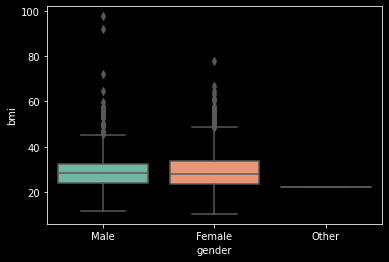

In [4]:
sns.boxplot(data=df, x='gender', y='bmi')

*Checking age column to find the proper blank values in bmi field*

<AxesSubplot:xlabel='bmi', ylabel='age'>

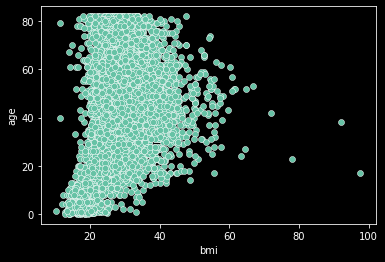

In [5]:
sns.scatterplot(data=df, x='bmi', y='age')

*creating  groups in terms of age range in toddler, teen, adult & senior and add that column to the dataset*

In [6]:
age_group=[]
for i in df['age']:
    if i<2.0:
        age_group.append("Toddler")
    elif i>2.0 and i<19.0:
        age_group.append("Teen")
    elif i>19.0 and i<60.0:
        age_group.append("Adult")
    else:
        age_group.append("Senior")
df['age_group'] = age_group
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


In [7]:
fig=px.box(df, x='age_group', y='bmi', color='gender')
fig.show()

# Imputing the null values of BMI. 
After applying impute the null values will replace with hard coded values in terms of the range

In [8]:
def impute_bmi(cols):
    bmi = cols[0]
    age_group = cols[1]
    gender = cols[2]
    if pd.isnull(bmi):
        if age_group == 'Senior':
            if gender == 'Male':
                return 29.0
            else:
                return 28.9
        elif age_group == 'Adult':
            if gender == 'Male':
                return 30.2
            else:
                return 28.8
        elif age_group == 'Teen':
            if gender == 'Male':
                return 20.6
            else:
                return 21.8
        else:
            if gender == 'Male':
                return 18.9
            else:
                return 18.05
    else:
        return bmi
df['bmi']=df[['bmi','age_group','gender']].apply(impute_bmi,axis=1)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Senior
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1,Senior
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Senior
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Adult
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Senior


# After imputing there will not be in null value

Now with isnull function and sum function we can observe that.

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

# EDA

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Shape return how many rows and columns are in the dataset.** 
*Here, Rows -> 5110 & Columns -> 13*

In [10]:
df.shape

(5110, 13)

# **The describe() method returns description of the data in the DataFrame**.

If the DataFrame contains numerical data, the description contains these information for each column:

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

*Percentile meaning: how many of the values are less than the given percentile.

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.872417,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.717927,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.700000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.300000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **Pandas DataFrame info() Method**
The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  age_group          5110 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 519.1+ KB


# Check if there are any duplicate values present or not
will use duplicated() function with sum() function for counting

In [13]:
df.duplicated().sum()

0

# Categorical and continous columns
into separte lists for future purspose

In [14]:
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'age_group']

# Checking value in each categorical column

In [15]:
cat_cols.append('age_group')
for i in cat_cols:
    print(f'============Values in {i}============\n{df[i].value_counts()}\n------------------------')

============Values in gender============
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
------------------------
============Values in hypertension============
0    4612
1     498
Name: hypertension, dtype: int64
------------------------
============Values in heart_disease============
0    4834
1     276
Name: heart_disease, dtype: int64
------------------------
============Values in ever_married============
Yes    3353
No     1757
Name: ever_married, dtype: int64
------------------------
============Values in work_type============
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
------------------------
============Values in Residence_type============
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
------------------------
============Values in smoking_status============
never smoked       1892
Unknown            1544
formerly smoked     885
smokes        

*As only one instance of gender "Other" is found so removing it*

In [16]:
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

# Visualizing Count of Categorical Columns

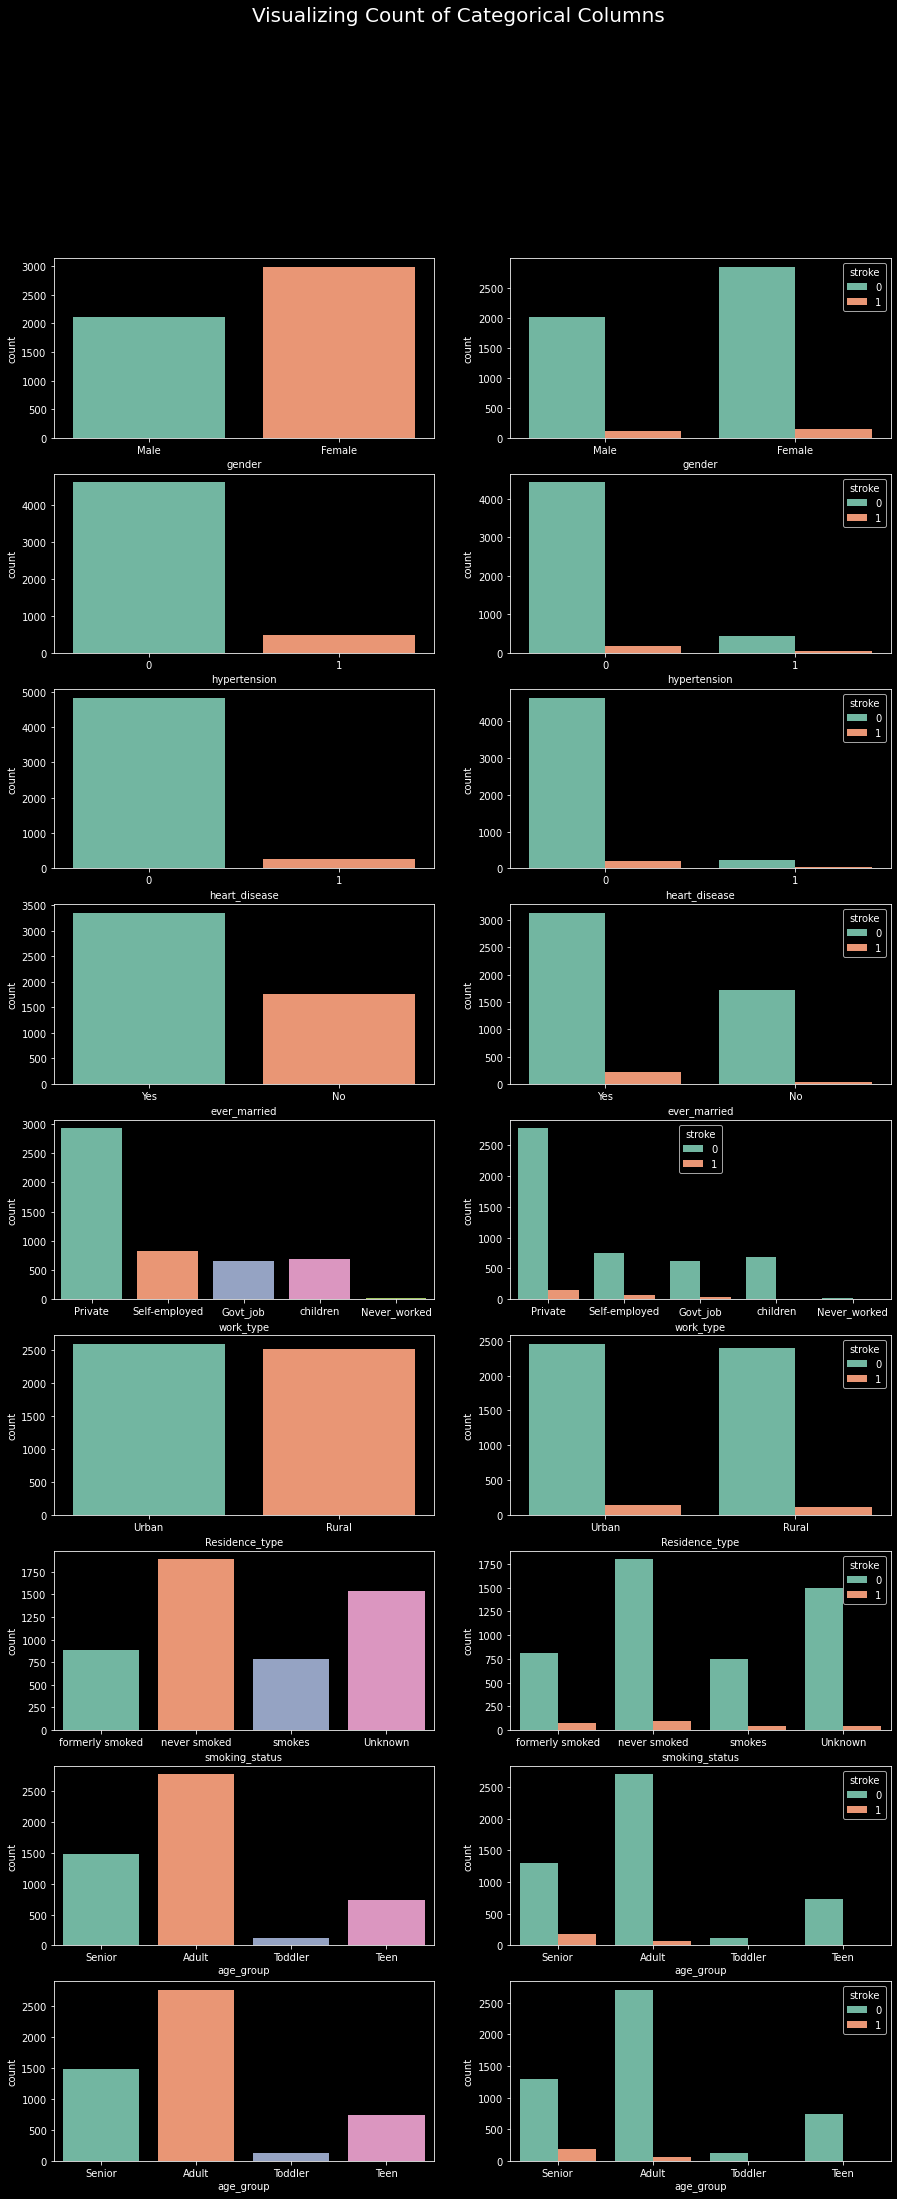

In [17]:
fig,ax=plt.subplots(9,2,figsize=(15,35))
for index, i in enumerate(cat_cols):
    plt.suptitle("Visualizing Count of Categorical Columns", size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='stroke')

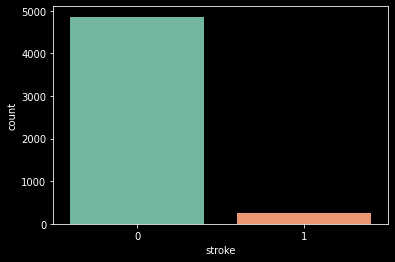

In [18]:
sns.countplot(data=df,x='stroke')
plt.show()

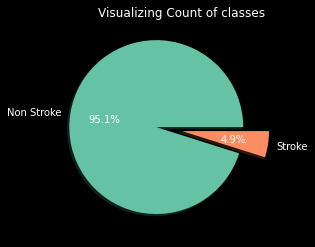

In [19]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

# Visualizing Distribution of Continous Columns

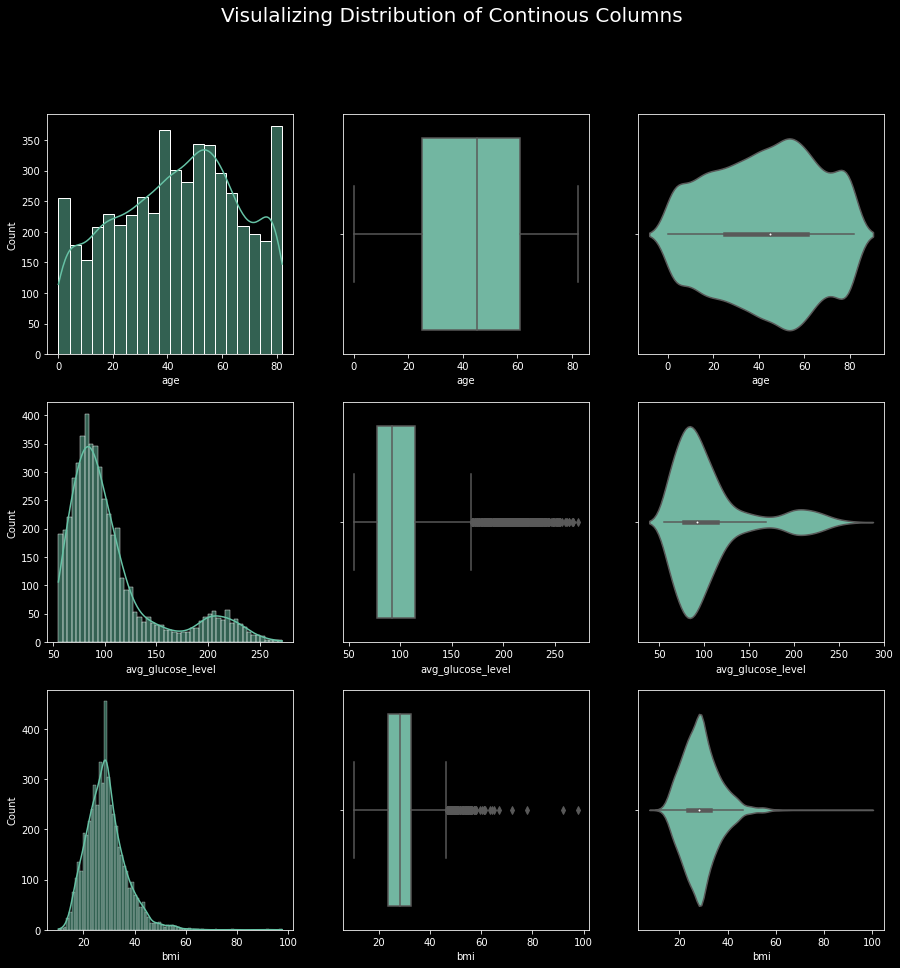

In [20]:
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index, i in enumerate(con_cols):
    plt.suptitle("Visulalizing Distribution of Continous Columns", size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

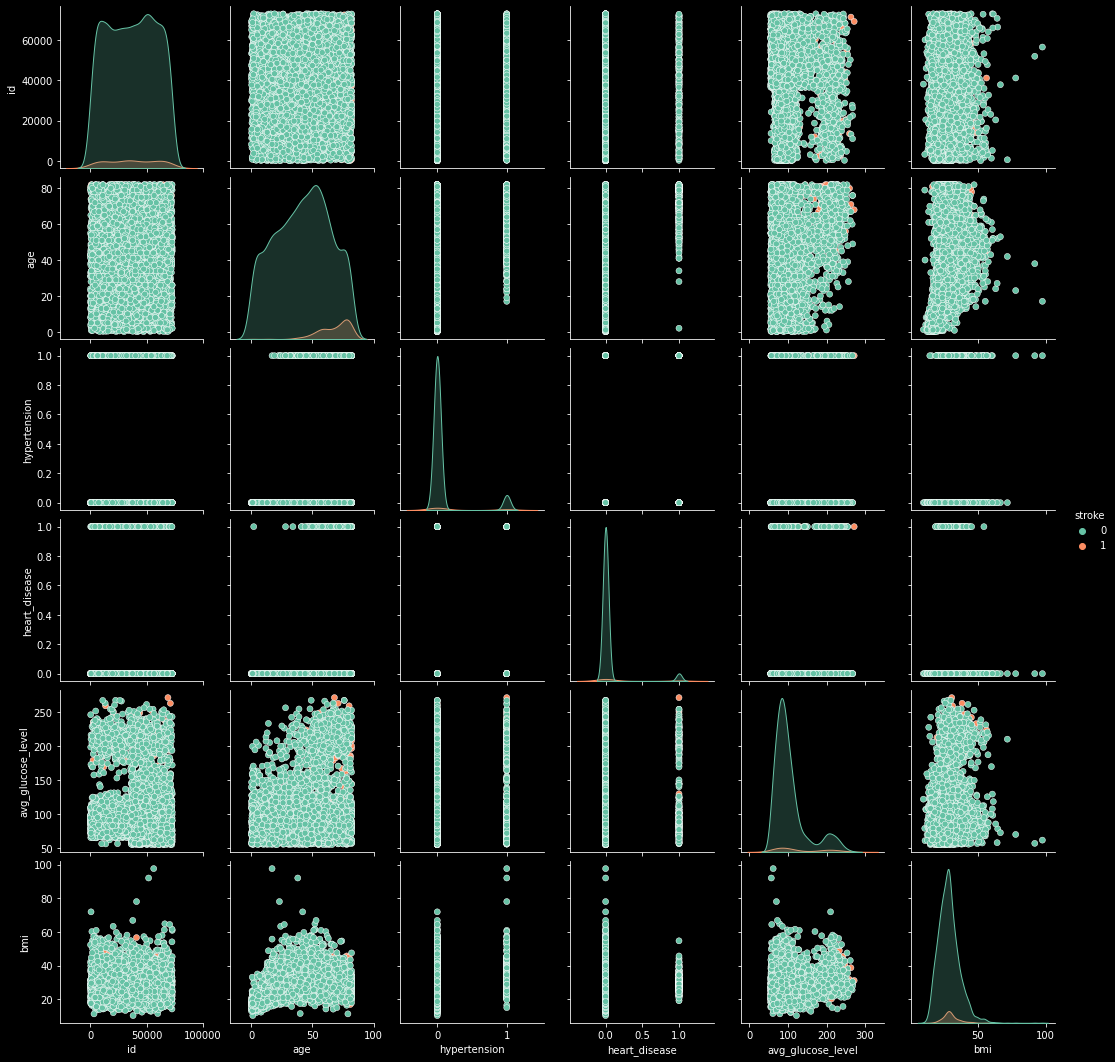

In [21]:
sns.pairplot(data=df, hue='stroke')

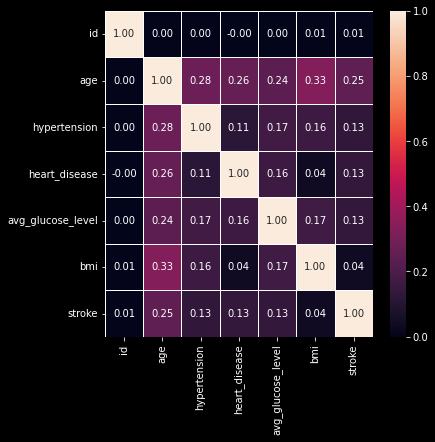

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, fmt='0.2f')
plt.show()

# Data Preprocessing part 2

**Pandas get_dummies method**

pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
*Syntax:* pandas.get_dummies(data, prefix=None, prefix_sep='',dummy_na=False,columns=None,sparse=False,drop_first=False,dtype=None)

*Parameters:*

data: whose data is to be manipulated.
prefix: String to append DataFrame column names. Pass a list with length equal to the number of columns when calling get_dummies on a DataFrame. Default value is None.
prefix_sep: Separator/delimiter to use if appending any prefix. Default is ‘_’
dummy_na: It adds a column to indicate NaN values, default value is false, If false NaNs are ignored.
columns: Column names in the DataFrame that needs to be encoded. Default value is None, If columns is None then all the columns with object or category dtype will be converted.
sparse: It  specify whether the dummy-encoded columns should be backed by a SparseArray (True) or a regular NumPy array (False). default value is False.
drop_first: Remove first level to get k-1 dummies out of k categorical levels.
dtype: Data type for new columns. Only a single dtype is allowed. Default value is np.uint8.
Returns: Dataframe (Dummy-coded data)

In [23]:
cat_cols.pop()
df_enc=pd.get_dummies(df[cat_cols],drop_first=True)
df_enc.head()

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,0,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [24]:
df[df_enc.columns]=df_enc
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,0,0,1,1,0,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.9,...,0,1,0,0,0,1,0,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,0,0,0,0,1,0,1,0,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,1,0,0,1,0,0,1,0,0,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,0,1,0,1,0,0


droping the uncategorical columns

In [25]:
df.drop(cat_cols,axis=1,inplace=True)
df.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age_group_Senior,age_group_Teen,age_group_Toddler
0,9046,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0,1,0,0
1,51676,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2,31112,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0,1,0,0
3,60182,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1,0,0,0
4,1665,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0,1,0,0


In [26]:
df_final=df.drop(['id','age_group_Senior','age_group_Teen','age_group_Toddler'],axis=1)
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
1,61.0,202.21,28.9,1,0,1,0,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0


# Oversampling of Minoritiy Class

oversample = RandomOverSampler(sampling_strategy='minority') This means that if the majority class had 1,000 examples and the minority class had 100, this strategy would oversampling the minority class so that it has 1,000 examples

In [27]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X=df_final.drop(['stroke'],axis=1)
y=df_final['stroke']
X_over, y_over = oversample.fit_resample(X,y)

# Spliting into train and test set

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

# Scalling of numerical columns

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[con_cols]=scaler.fit_transform(X_train[con_cols])
X_test[con_cols]=scaler.transform(X_test[con_cols])
X_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
9192,1.134119,-0.223995,0.434319,1,1,0,1,0,0,0,0,1,0
3629,0.144126,1.569085,1.460056,1,1,0,0,0,0,0,0,1,0
9526,0.504123,-0.757572,-1.198192,1,1,0,1,0,0,0,1,0,0
539,-0.530870,-0.678423,3.179249,0,1,0,1,0,0,0,0,0,0
5479,0.999120,2.051587,1.069987,0,1,0,1,0,0,0,0,1,0


# Model Building

> **KNearest Neighbors**

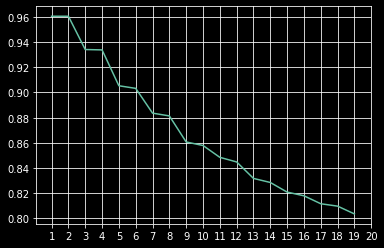

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())
    
x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks
    
plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1458
           1       0.95      1.00      0.97      1458

    accuracy                           0.97      2916
   macro avg       0.97      0.97      0.97      2916
weighted avg       0.97      0.97      0.97      2916



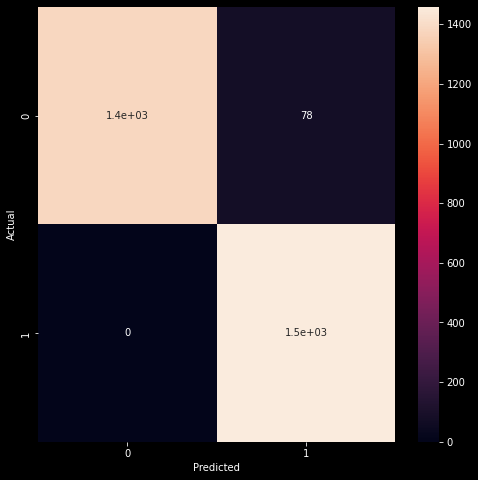

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,knn.predict(X_test)))
